<h2 id="exercises">Exercises</h2>
<p>Within your <code>codeup-data-science</code> directory, create a new repo named <code>anomaly-detection-exercises</code>. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.</p>
<p>Save this work in your <code>anomaly-detection-exercises</code> repo. Then add, commit, and push your changes.</p>
<p><strong>continuous_probabilistic_methods.py</strong> or <strong>continuous_probabilistic_methods.ipynb</strong>


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.</p>



In [35]:
def get_lower_and_upper_bounds(series, multiplier):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    return lower_bound, upper_bound


In [ ]:
def get_lower_and_upper_bounds(series, multiplier):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    return lower_bound, upper_bound

In [101]:
get_lower_and_upper_bounds(df['Temperature'], 1.5)

(16.700000000000003, 104.7)

In [99]:
get_lower_and_upper_bounds(df, 1.5)

(Temperature           16.700000
 Rainfall               0.260000
 Flyers                 4.000000
 Price                  0.500000
 Sales                  5.000000
 Temperature_zscore    -2.465224
 Rainfall_zscore       -2.069258
 Flyers_zscore         -2.622407
 Sales_zscore          -0.739855
 dtype: float64,
 Temperature           104.700000
 Rainfall                1.300000
 Flyers                 76.000000
 Price                   0.500000
 Sales                  45.000000
 Temperature_zscore      2.407126
 Rainfall_zscore         1.733096
 Flyers_zscore           2.607283
 Sales_zscore            0.554404
 dtype: float64)

In [100]:
upper_bound[0]

104.7

<p>Using <a href="https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv">lemonade.csv</a> dataset and focusing on continuous variables:</p>
<ul>


In [36]:
df = pd.read_csv('lemonade.csv')

In [37]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Get a feel for the data.

In [38]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [39]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


array([[<AxesSubplot:title={'center':'Flyers'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Temperature'}>, <AxesSubplot:>]],
      dtype=object)

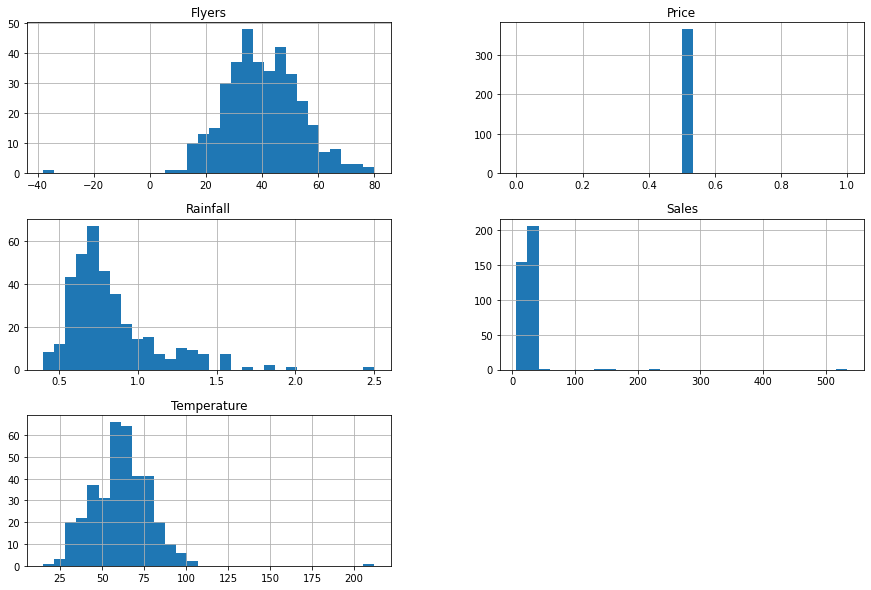

In [40]:
df.hist(bins=30, figsize=(15,10))

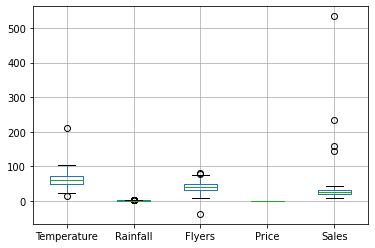

In [41]:
df.boxplot();

<li>Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of <code>lemonade.csv</code>, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?</li>


In [42]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df, 1.5)
lower_bound

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [43]:
lower_bound[0]

16.700000000000003

In [44]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [45]:
lower_bound

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [46]:
lower_bound[2]

4.0

In [47]:
low_outlier_temp = df[df.Temperature<lower_bound[0]].Temperature
low_outlier_rain = df[df.Rainfall<lower_bound[1]].Rainfall
low_outlier_flyers = df[df.Flyers<lower_bound[2]].Flyers
low_outlier_price = df[df.Price<lower_bound[3]].Price
low_outlier_sales = df[df.Sales<lower_bound[4]].Sales


In [126]:
low_outlier_temp

364    15.1
Name: Temperature, dtype: float64

In [102]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.894938,4.292372,-1.823427,-0.578073
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.789739,1.842779,-1.823427,-0.481003
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.479680,1.842779,-0.951812,-0.416291
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.948151,0.819069,-0.879177,-0.351578
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.042276,0.636263,-0.516004,-0.319221


Generalize:
- Call function above and pass upper / lower bound to key/dictionary pair
- 

In [108]:
upper_bound

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

In [110]:
get_lower_and_upper_bounds(df.Sales, 1.5)

(5.0, 45.0)

In [103]:
cols

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [115]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']
dict = {}

for col in cols:
    lower, upper = get_lower_and_upper_bounds(df[col], 1.5)
    dict[col]={'upper':upper, 'lower':lower}
    

    


In [125]:
list(dict.keys())

'Temperature'

In [48]:
low_outlier_temp

364    15.1
Name: Temperature, dtype: float64

In [49]:
low_outlier_rain

Series([], Name: Rainfall, dtype: float64)

In [50]:
low_outlier_flyers

324   -38
Name: Flyers, dtype: int64

In [51]:
low_outlier_price

Series([], Name: Price, dtype: float64)

In [52]:
low_outlier_sales

Series([], Name: Sales, dtype: int64)

- No low outliers for rain, sales,  or price 
- Temp low outlier: 15.1
- Flyers low outlier: -38 doesn't make any sense

<li>Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of <code>lemonade.csv</code>, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?</li>


In [53]:
upper_bound

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

In [54]:
high_outlier_temp = df[df.Temperature>upper_bound[0]].Temperature
high_outlier_rain = df[df.Rainfall>upper_bound[1]].Rainfall
high_outlier_flyers = df[df.Flyers>upper_bound[2]].Flyers
high_outlier_price = df[df.Price>upper_bound[3]].Price
high_outlier_sales = df[df.Sales>upper_bound[4]].Sales


In [55]:
high_outlier_temp

41    212.0
Name: Temperature, dtype: float64

In [56]:
high_outlier_rain

0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [57]:
len(high_outlier_rain)

28

In [58]:
high_outlier_rain.sort_values

<bound method Series.sort_values of 0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64>

In [59]:
high_outlier_flyers

166    77
194    80
Name: Flyers, dtype: int64

In [60]:
high_outlier_price

Series([], Name: Price, dtype: float64)

In [61]:
high_outlier_sales

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

In [62]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [63]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [64]:
list(df.columns)

['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [65]:
cols = list(df.columns)
cols.remove('Date')
cols.remove('Day')
cols.remove('Price')


for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.894938,4.292372,-1.823427,-0.578073
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.789739,1.842779,-1.823427,-0.481003
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.479680,1.842779,-0.951812,-0.416291
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.948151,0.819069,-0.879177,-0.351578
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.042276,0.636263,-0.516004,-0.319221
...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,-1.025666,0.636263,-0.516004,-0.286865
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,-1.296967,1.550290,-0.588639,-0.383934
362,12/29/17,Friday,39.5,1.25,17,0.5,15,-1.202842,1.550290,-1.678157,-0.416291
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,-1.679004,2.208390,-1.314984,-0.481003


In [66]:
df[df.Sales>upper_bound[4]]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.307464,-1.301475,1.372495,3.725339
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.781472,-1.155230,2.026206,4.210686
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.122597,-1.045547,2.026206,6.702136
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.272090,-0.862742,0.646149,16.376724


- No high outliers on price
- One for temp (212) eliminate, makes no sense (day 41, look at days around it to see if 21 or 12 make sense)
- 28 high outliers for rain (1.33-2.55 in, compared to a mean of 0.825973)
- 2 high outliers for fliers (77,80, meal =40)
- 4 outliers for sales (143, 158, 235, 534) (z-score = 3.7, 4.2, 6.7, and 16.37)
  - Definitely throw out the 534, Arguments could be made for keeping or eliminating some of the others


<li>Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of <code>lemonade.csv</code>. Do these lower outliers make sense? Which outliers should be kept?</li>


In [67]:
lower_bound3, upper_bound3 = get_lower_and_upper_bounds(df, 3)
lower_bound3

Temperature          -16.300000
Rainfall              -0.130000
Flyers               -23.000000
Price                  0.500000
Sales                -10.000000
Temperature_zscore    -4.292355
Rainfall_zscore       -3.495140
Flyers_zscore         -4.583541
Sales_zscore          -1.225203
dtype: float64

In [68]:
low_outlier_temp3 = df[df.Temperature<lower_bound3[0]].Temperature
low_outlier_rain3 = df[df.Rainfall<lower_bound3[1]].Rainfall
low_outlier_flyers3 = df[df.Flyers<lower_bound3[2]].Flyers
low_outlier_price3 = df[df.Price<lower_bound3[3]].Price
low_outlier_sales3 = df[df.Sales<lower_bound3[4]].Sales

In [ ]:
a_dictionary = {}

for number in range (0,4):
    a_dictionary['keys']

In [69]:
low_outlier_temp3

Series([], Name: Temperature, dtype: float64)

In [70]:
low_outlier_rain3

Series([], Name: Rainfall, dtype: float64)

In [71]:
low_outlier_flyers3

324   -38
Name: Flyers, dtype: int64

In [72]:
low_outlier_sales3

Series([], Name: Sales, dtype: int64)

Only low outlier for this expanded range was the -38 flyers which we already decided to eliminate

<li>Using the multiplier of 3, IQR Range Rule, and the upper bounds,  identify the outliers above the upper_bound in each colum of <code>lemonade.csv</code>. Do these upper outliers make sense? Which outliers should be kept?</li>


In [73]:
high_outlier_temp3 = df[df.Temperature>upper_bound3[0]].Temperature
high_outlier_rain3 = df[df.Rainfall>upper_bound3[1]].Rainfall
high_outlier_flyers3 = df[df.Flyers>upper_bound3[2]].Flyers
high_outlier_price3 = df[df.Price>upper_bound3[3]].Price
high_outlier_sales3 = df[df.Sales>upper_bound3[4]].Sales

In [ ]:
# More pythonic way of generalizing the function above

In [89]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.894938,4.292372,-1.823427,-0.578073
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.789739,1.842779,-1.823427,-0.481003
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.479680,1.842779,-0.951812,-0.416291
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.948151,0.819069,-0.879177,-0.351578
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.042276,0.636263,-0.516004,-0.319221


In [94]:
# Try to make the cell above a loop -function
i=0
cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in cols:
    'high_outlier3_'+col = df[df.col>upper_bound3[i]]
    i +=1



SyntaxError: cannot assign to operator (4074949606.py, line 6)

In [96]:
test =print('high_outlier3_'+cols[0])

high_outlier3_Temperature


In [98]:
type(test)

NoneType

In [92]:
cols

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

SyntaxError: cannot assign to operator (712210143.py, line 2)

In [74]:
high_outlier_temp3

41    212.0
Name: Temperature, dtype: float64

In [75]:
high_outlier_rain3

0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [76]:
high_outlier_flyers3

Series([], Name: Flyers, dtype: int64)

In [77]:
high_outlier_sales3

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

- Here we have no outliers for flyers or price
- One for temp at 212 which we already threw out
- From 28 rain down to 4 (1.82-2.5in)
- Same four outliers for sales

1. Identify if any columns in <code>lemonade.csv</code> are normally distributed. For normally distributed columns:



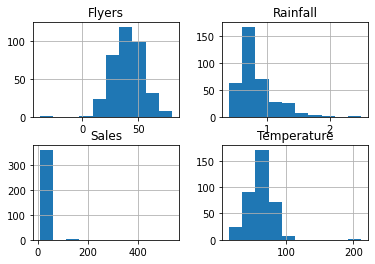

In [78]:
df[['Flyers', 'Rainfall', 'Temperature', 'Sales']].hist();


<li>Use a 2 sigma decision rule to isolate the outliers.</li>
<ul>


In [79]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.894938,4.292372,-1.823427,-0.578073
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.789739,1.842779,-1.823427,-0.481003
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.479680,1.842779,-0.951812,-0.416291
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.948151,0.819069,-0.879177,-0.351578
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.042276,0.636263,-0.516004,-0.319221


In [80]:
outlier_temp2 = df[(df.Temperature_zscore<=-2) | (df.Temperature_zscore>=2)].Temperature
outlier_flyers2 = df[(df.Flyers_zscore<=-2) | (df.Flyers_zscore>=2)].Flyers
outlier_rain2 = df[(df.Rainfall_zscore<=-2) | (df.Rainfall_zscore>=2)].Rainfall

In [81]:
outlier_temp2

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [82]:
outlier_flyers2

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

In [83]:
outlier_rain2

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

<li>Do these make sense?</li>


<li>Should certain outliers be kept or removed?</li>


1. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from <code>lemonade.csv</code>

In [84]:
outlier_temp3 = df[(df.Temperature_zscore<=-3) | (df.Temperature_zscore>=3)].Temperature
outlier_flyers3 = df[(df.Flyers_zscore<=-3) | (df.Flyers_zscore>=3)].Flyers
outlier_rain3 = df[(df.Rainfall_zscore<=-3) | (df.Rainfall_zscore>=3)].Rainfall

In [85]:
outlier_temp3

41    212.0
Name: Temperature, dtype: float64

In [86]:
outlier_flyers3

324   -38
Name: Flyers, dtype: int64

In [87]:
outlier_rain3

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64